# EDA

The goal of our project is to help start ups understand what funding they should expect given some feature like location, company age, funding round, etc. To do this we have collected 20XX-20YY Crunchbase data (this period was selected as only data from this period was freely available). The raw data for our project comes from four different files 'Acquisitions', 'Companies', 'Investment', 'Round'. In this following section we will explore each of these datasets.

## 1. Importing Packages &amp; Loading in Files

In [ ]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Reading in our four raw CSVs as SQL dataframes for our analysis

In [ ]:


acquisitions = _deepnote_execute_sql("""SELECT *
FROM '/work/Final/raw data/acquisitions-20220215-135412.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
acquisitions

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,2012-07-23 00:00:00,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,None,None,None,None,None,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2012-02-02 00:00:00,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,None,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,2005-06-12 00:00:00,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,2014-01-07 00:00:00,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,None,None,None,None,None,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,None,USA,NY,New York City,Mamaroneck,2001-02-02 00:00:00,2001-02,NaN,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18963,/organization/zyrion,Zyrion Inc,Networking|Software,USA,CA,SF Bay Area,Sunnyvale,/organization/kaseya,Kaseya,Data Centers|Data Security|Flash Storage|Homel...,None,None,None,None,2013-06-25 00:00:00,2013-06,NaN,USD
18964,/organization/zystor,Zystor,Biotechnology,USA,WI,Milwaukee,Milwaukee,/organization/biomarin-pharmaceutical,BioMarin Pharmaceutical,Pharmaceuticals,USA,CA,SF Bay Area,San Rafael,2010-08-18 00:00:00,2010-08,115000000.0,USD
18965,/organization/zytex-group,Zytex group,Manufacturing,IND,16,Mumbai,Mumbai,/organization/brenntag-ag,Brenntag AG,Chemicals|Manufacturing|Services,DEU,7,Essen,Mülheim An Der Ruhr,2013-09-25 00:00:00,2013-09,14000000.0,USD
18966,/organization/’compass-solutions,N’compass Solutions,Information Technology,USA,MN,Minneapolis,Maple Grove,/organization/alphapoint-technology,AlphaPoint Technology,Data Center Infrastructure|Intellectual Asset ...,USA,FL,Sarasota - Bradenton,Sarasota,2014-12-25 00:00:00,2014-12,4800000.0,USD


In [ ]:


companies = _deepnote_execute_sql("""SELECT *
FROM '/work/Final/splitted data/companies_training.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
companies

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,None,2015-01-05,2015-01-05
1,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,None,None,None,None,1,None,2014-01-30,2014-01-30
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
4,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53089,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,closed,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15
53090,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,1510500,operating,USA,MA,Boston,Cambridge,4,None,2010-10-21,2012-10-18
53091,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,8500000,acquired,USA,WI,Milwaukee,Milwaukee,1,None,2004-12-16,2004-12-16
53092,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29


In [ ]:


investments = _deepnote_execute_sql("""SELECT *
FROM '/work/Final/splitted data/investments_training.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
investments

,Unnamed: 0,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,new_raised_amount_usd,funding_round
0,0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,...,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,2.000000e+06,venture A
1,1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,...,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,None,2014-07-24,NaN,NaN,venture
2,30,/organization/1-2-3-listo,"1,2,3 Listo",E-Commerce,CHL,12,Santiago,Las Condes,/organization/start-up-chile,Start-Up Chile,...,12,Santiago,Santiago,/funding-round/6de4609e894495105bc791ed64361288,seed,None,2013-02-18,40000.0,4.000000e+04,seed
3,31,/organization/1-800-dentist,1-800-DENTIST,Health and Wellness,USA,CA,Los Angeles,Los Angeles,/organization/bain-capital-ventures,Bain Capital Ventures,...,MA,Boston,Boston,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,None,2010-08-19,NaN,NaN,undisclosed
4,32,/organization/1-800-dentist,1-800-DENTIST,Health and Wellness,USA,CA,Los Angeles,Los Angeles,/organization/cue-ball,Cue Ball,...,MA,Boston,Boston,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,None,2010-08-19,NaN,NaN,undisclosed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134516,168631,/organization/zystor,Zystor,Biotechnology,USA,WI,Milwaukee,Milwaukee,/organization/state-of-wisconsin-investment-board,State of Wisconsin Investment Board,...,WI,Madison,Madison,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0,1.214286e+06,venture A
134517,168632,/organization/zystor,Zystor,Biotechnology,USA,WI,Milwaukee,Milwaukee,/organization/stonehenge-capital,Stonehenge Capital,...,CT,Hartford,Stamford,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0,1.214286e+06,venture A
134518,168633,/organization/zystor,Zystor,Biotechnology,USA,WI,Milwaukee,Milwaukee,/organization/venture-investors,Venture Investors,...,WI,Madison,Madison,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0,1.214286e+06,venture A
134519,168634,/organization/zytoprotec,Zytoprotec,Biotechnology,AUT,3,Vienna,Gerasdorf Bei Wien,/organization/baxter-international,Baxter International,...,IL,Chicago,Deerfield,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,2013-01-29,2686600.0,2.686600e+06,venture A


In [ ]:


rounds = _deepnote_execute_sql("""SELECT *
FROM '/work/Final/splitted data/rounds_training.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
rounds

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funding_round
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0,venture B
1,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,None,None,None,None,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,venture B
2,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,venture A
3,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,None,2014-07-24,NaN,venture
4,/organization/1-2-3-listo,"1,2,3 Listo",E-Commerce,CHL,12,Santiago,Las Condes,/funding-round/6de4609e894495105bc791ed64361288,seed,None,2013-02-18,40000.0,seed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91661,/organization/zyrra,Zyrra,E-Commerce,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,None,2012-10-18,140500.0,venture
91662,/organization/zyrra,Zyrra,E-Commerce,USA,MA,Boston,Cambridge,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,None,2010-12-15,875000.0,angel
91663,/organization/zystor,Zystor,Biotechnology,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,8500000.0,venture A
91664,/organization/zytoprotec,Zytoprotec,Biotechnology,AUT,3,Vienna,Gerasdorf Bei Wien,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,2013-01-29,2686600.0,venture A


In [ ]:


final = _deepnote_execute_sql("""SELECT *
FROM '/work/Final/splitted data/final.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
final

,company_permalink,company_name,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,...,Consumer_Discretionary_round_index,Consumer_Staples_round_index,Energy_round_index,Financials_round_index,Health_Care_round_index,Industrials_round_index,Information_Technology_round_index,Materials_round_index,Real_Estate_round_index,Utilities_round_index
0,/organization/-fame,#fame,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,...,0,0,0,0,0,0,0,0,0,0
1,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",None,None,None,None,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,...,6,0,0,0,0,0,5,0,0,0
2,/organization/0-6-com,0-6.com,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,...,0,0,0,0,0,0,4,0,0,0
3,/organization/004-technologies,004 Technologies,USA,IL,"Springfield, Illinois",Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,None,2014-07-24,...,0,0,0,0,0,0,5,0,0,0
4,/organization/1-2-3-listo,"1,2,3 Listo",CHL,12,Santiago,Las Condes,/funding-round/6de4609e894495105bc791ed64361288,seed,None,2013-02-18,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88898,/organization/zyrra,Zyrra,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,None,2012-10-18,...,0,0,0,0,0,4,0,0,0,0
88899,/organization/zyrra,Zyrra,USA,MA,Boston,Cambridge,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,None,2010-12-15,...,0,0,0,0,0,2,0,0,0,0
88900,/organization/zystor,Zystor,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,2004-12-16,...,0,0,0,0,5,0,0,0,0,0
88901,/organization/zytoprotec,Zytoprotec,AUT,3,Vienna,Gerasdorf Bei Wien,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,2013-01-29,...,0,0,0,0,5,0,0,0,0,0


## 2. Missing Values &amp; Data Types

There are a considerable amount of rows with null values, especially 'price_amount'. I believe this may be due to the same a company acquiring a number of different companies but at the same time, hence it all combining into one.

In [ ]:
#calculating the percentage of missing values for each column in the acquisition file
(acquisitions.isna().sum() / len(acquisitions)) *100

company_permalink          0.000000
company_name               0.000000
company_category_list     26.270561
company_country_code      24.609869
company_state_code        26.086040
company_region            25.885702
company_city              25.885702
acquirer_permalink         0.000000
acquirer_name              0.000000
acquirer_category_list    12.589625
acquirer_country_code      6.168283
acquirer_state_code        7.565373
acquirer_region            7.164698
acquirer_city              7.164698
acquired_at                0.063264
acquired_month             0.073809
price_amount              73.576550
price_currency_code        0.031632
dtype: float64

In [ ]:
#calculating the percentage of missing values for each column in the companies file

(companies.isna().sum() / len(companies)) *100

permalink             0.000000
name                  0.000000
homepage_url          7.739104
category_list         4.791502
funding_total_usd     0.000000
status                0.000000
country_code         10.500245
state_code           12.939315
region               12.133198
city                 12.131314
funding_rounds        0.000000
founded_at           22.995065
first_funding_at      0.032019
last_funding_at       0.000000
dtype: float64

In [ ]:
#calculating the percentage of missing values for each column in the round file

(rounds.isna().sum() / len(rounds)) *100

company_permalink           0.000000
company_name                0.000000
company_category_list       3.014204
company_country_code        7.562237
company_state_code          9.576070
company_region              8.877883
company_city                8.875701
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.928894
funded_at                   0.000000
raised_amount_usd          17.375035
funding_round               0.000000
dtype: float64

In [ ]:
#calculating the percentage of missing values for each column in the investment file

(investments.isna().sum() / len(investments)) *100

Unnamed: 0                  0.000000
company_permalink           0.000000
company_name                0.000000
company_category_list       2.191479
company_country_code        6.244378
company_state_code          7.990574
company_region              7.412226
company_city                7.411482
investor_permalink          0.006690
investor_name               0.006690
investor_country_code      18.358472
investor_state_code        26.595847
investor_region            25.681492
investor_city              19.104824
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         52.113796
funded_at                   0.000000
raised_amount_usd          12.824020
new_raised_amount_usd      12.824020
funding_round               0.000000
dtype: float64

In [ ]:
#printing all the column datatypes to see if they need to be converted
print(acquisitions.dtypes, companies.dtypes, investments.dtypes, rounds.dtypes)

company_permalink          object
company_name               object
company_category_list      object
company_country_code       object
company_state_code         object
company_region             object
company_city               object
acquirer_permalink         object
acquirer_name              object
acquirer_category_list     object
acquirer_country_code      object
acquirer_state_code        object
acquirer_region            object
acquirer_city              object
acquired_at                object
acquired_month             object
price_amount              float64
price_currency_code        object
dtype: object permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_fundi

From the above we can see that the data type from most columns are object when they should be numeric or categorical

In [ ]:
#creating a function to convert column datatypes
def adjust_dtypes(df: pd.DataFrame, data_types: dict) -> pd.DataFrame:
    for column in df.columns:
        if column in data_types['numerical']:
            df[column] = df[column].astype(float)
        else:
            df[column] = df[column].astype('category')

    return df

In [ ]:
#variable to store what datatype each column should be
data_types ={
    'numerical' : ['funding_total_usd'],
    'categorical': 
    {
        'nominal': [ 'permalink', 'name', 'homepage_url', 'category_list'
                   , 'status', 'country_code', 'state_code', 'region'
                   , 'founded_at', 'first_funding_at', 'last_funding_at'],
        'ordinal': ['funding_rounds']
    }
}

In [ ]:
#converting column datatypes
companies.replace('-',0, inplace=True)
companies = adjust_dtypes(companies, data_types)

## 3. Comparing Funding Between Files

In [ ]:
#printing all the column names to see if there are duplicated columns

print(acquisitions.columns, companies.columns, investments.columns, rounds.columns)

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'acquirer_permalink', 'acquirer_name',
       'acquirer_category_list', 'acquirer_country_code',
       'acquirer_state_code', 'acquirer_region', 'acquirer_city',
       'acquired_at', 'acquired_month', 'price_amount', 'price_currency_code'],
      dtype='object') Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object') Index(['Unnamed: 0', 'company_permalink', 'company_name',
       'company_category_list', 'company_country_code', 'company_state_code',
       'company_region', 'company_city', 'investor_permalink', 'investor_name',
       'investor_country_code', 'investor_state_code', 'investor_region',
       'investor_city', 'fu

In [ ]:
companies.replace('-',0, inplace=True)
companies = adjust_dtypes(companies, data_types)

We can see from above that there are many duplicated features like company name, funding amount, company category, etc. We need to check if these duplicate features are consistent across datasets

In [ ]:
#find consistent comapanies
print(acquisitions['price_amount'].sum())
print(companies['funding_total_usd'].sum())
print(investments['raised_amount_usd'].sum())
print(rounds['raised_amount_usd'].sum())
#company and rounds total funding are very comparable
print(rounds['raised_amount_usd'].sum()/companies['funding_total_usd'].sum())
# why are investments much higher than companies or rounds?
print(investments['raised_amount_usd'].sum()/companies['funding_total_usd'].sum())

4393178659474.0
797691135951.8634
1788182127183.4639
797677680958.0
0.9999831325769374
2.2416973770802584


## 4. Total Funding Distribution

In [ ]:
#investigating the funding distribution
companies['funding_total_usd'].describe()

count    5.309400e+04
mean     1.502413e+07
std      1.835583e+08
min      0.000000e+00
25%      4.000000e+04
50%      1.000000e+06
75%      6.800000e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [ ]:
#returning the most funded company funding round
companies.iloc[companies['funding_total_usd'].idxmax(),:]

permalink                                        /organization/verizon
name                                            Verizon Communications
homepage_url                                   http://www.verizon.com/
category_list        Communications Infrastructure|Information Tech...
funding_total_usd                                        30079503000.0
status                                                             ipo
country_code                                                       USA
state_code                                                          NY
region                                                   New York City
city                                                          New York
funding_rounds                                                       5
founded_at                                                  1983-10-07
first_funding_at                                            2010-01-26
last_funding_at                                    2014-02-28 00:00:00
Name: 

In [ ]:
#calculating how many of the bottom rounds will equal the most funded round
companies = companies[companies['funding_total_usd'] > 0]
companies = companies.sort_values('funding_total_usd')
companies_lower = companies.iloc[:27200]
companies_lower['funding_total_usd'].sum()/1000000000

29.78698808830783

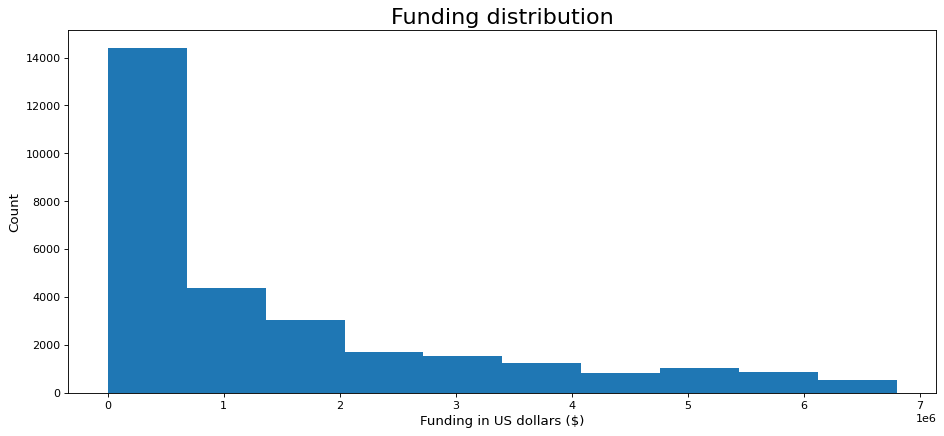

In [ ]:
#plot to display the funding distribution
companies_outliers_out = companies[companies['funding_total_usd'].between(1000, 6800473.0)]
figure(figsize=(14, 6), dpi=80)
plt.hist(companies_outliers_out['funding_total_usd'])
plt.title("Funding distribution", fontsize = 20)
plt.xlabel("Funding in US dollars ($)", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

## 5. Total Funding over Time

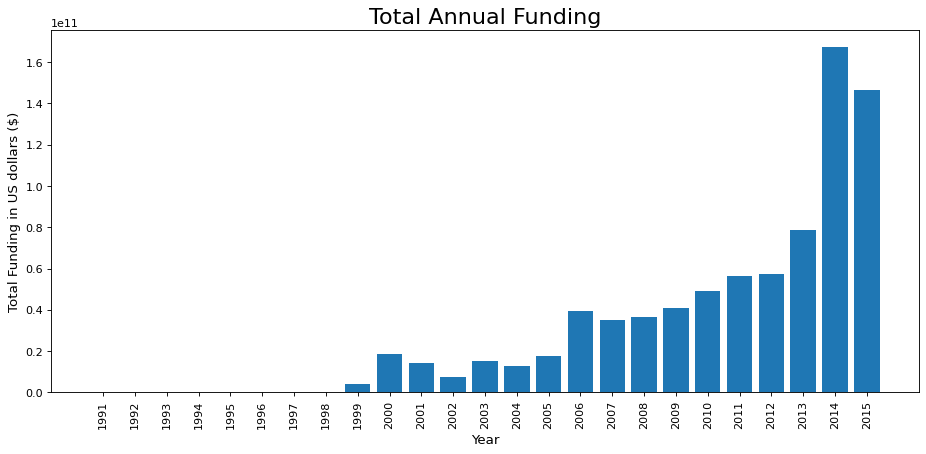

In [ ]:
#time series plot to show total funding over time
#extracting year from the date column
year = []
x = rounds['funded_at'].astype('string').reset_index()
x = x['funded_at']
for i in range(len(x)):
    y = x[i][:-6]
    year.append(y)
year = pd.DataFrame (year, columns = ['Year'])
# charting total annual funding since 1990
round_time = pd.concat([year, rounds], axis=1, join="inner")
round_time_filt = round_time[year['Year'].astype(float) > 1990]
round_time_sum = round_time_filt.groupby("Year").sum().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(round_time_sum["Year"], round_time_sum['raised_amount_usd'])
plt.title("Total Annual Funding", fontsize = 20)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()


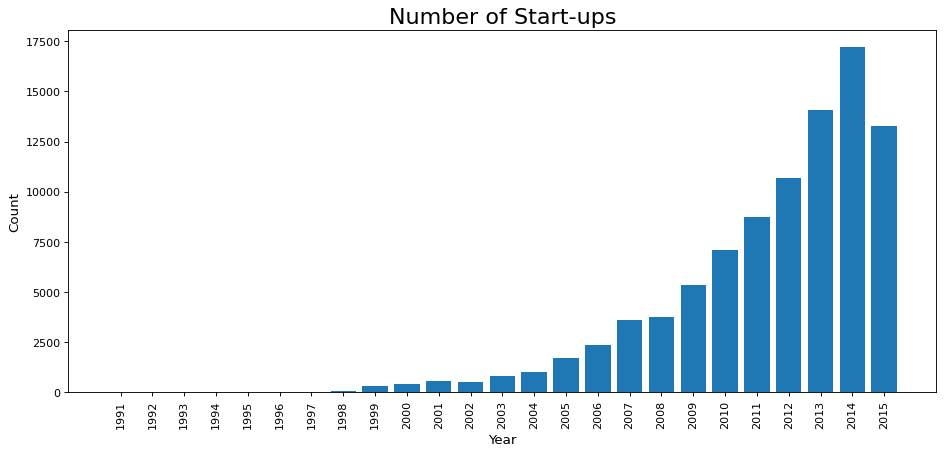

In [ ]:
#Time series plot to show the number of companies over time
#extracting year from the date column
year = []
x = rounds['funded_at'].astype('string').reset_index()
x = x['funded_at']
for i in range(len(x)):
    y = x[i][:-6]
    year.append(y)
year = pd.DataFrame (year, columns = ['Year'])
# charting total annual funding since 1990
raised_amount = rounds['raised_amount_usd'].to_frame()
raised_amount.fillna(0, inplace=True)
round_time = pd.concat([year, raised_amount], axis=1, join="inner")
round_time = round_time[year['Year'].astype(float) > 1990]
round_time = round_time.groupby("Year").count().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(round_time["Year"], round_time['raised_amount_usd'])
plt.title("Number of Start-ups", fontsize = 20)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

## 6. Total Funding by Funding Type

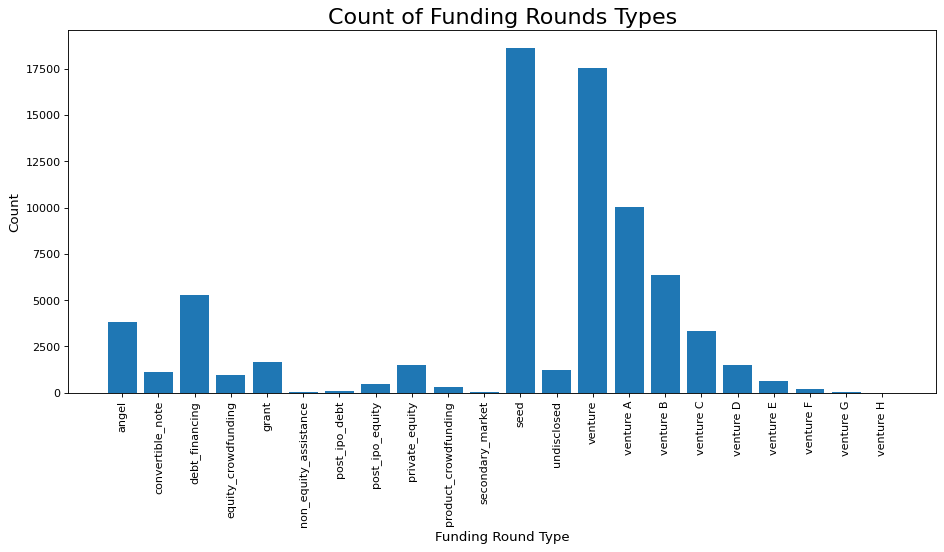

In [ ]:
#plot of number of funding round types 
rounds_fund = final[final['raised_amount_usd'].notna()].groupby("funding_round").count().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(rounds_fund['funding_round'], rounds_fund['raised_amount_usd'])
plt.title("Count of Funding Rounds Types", fontsize = 20)
plt.xlabel("Funding Round Type", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

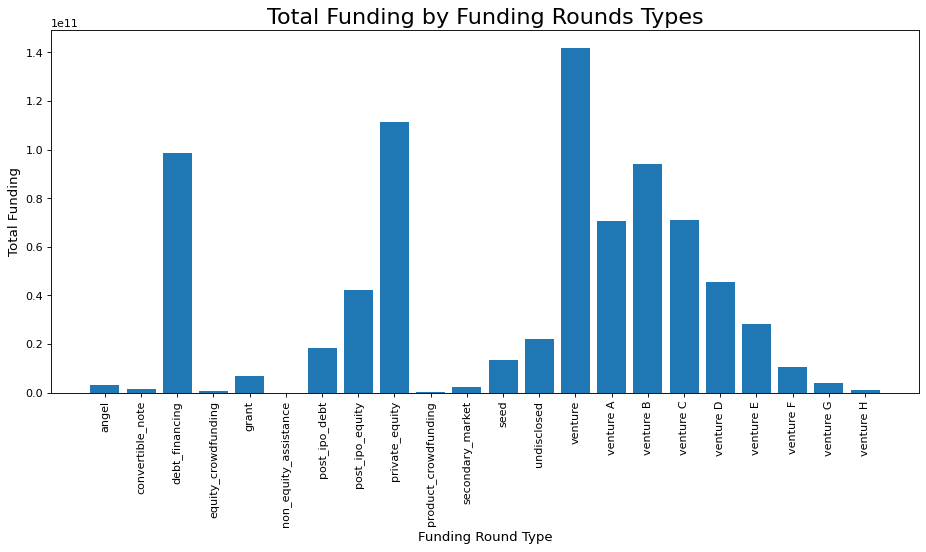

In [ ]:
#plot to show the total value of funding round types
rounds_fund_sum = final[final['raised_amount_usd'].notna()].groupby("funding_round").sum().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(rounds_fund_sum['funding_round'], rounds_fund_sum['raised_amount_usd'])
plt.title("Total Funding by Funding Rounds Types", fontsize = 20)
plt.xlabel("Funding Round Type", fontsize = 12)
plt.ylabel("Total Funding", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

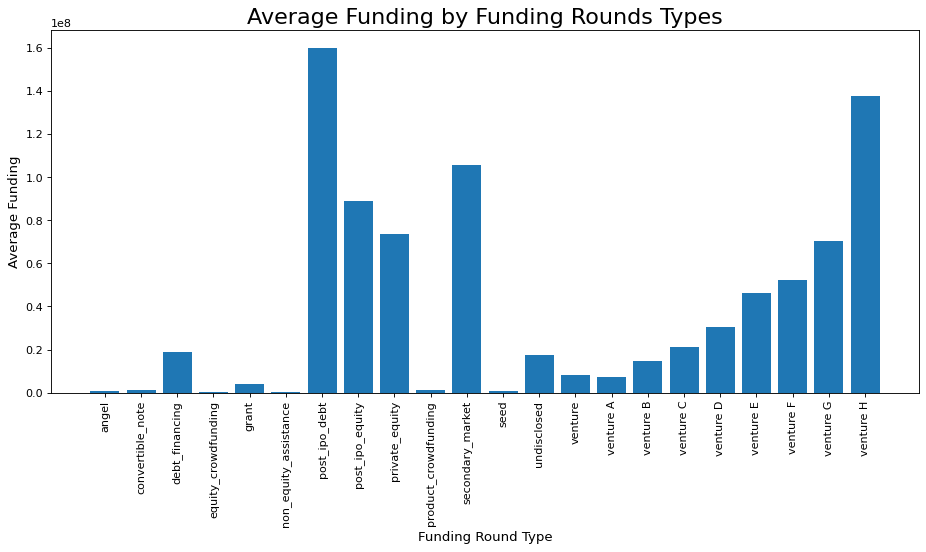

In [ ]:
#plot to show the average funding per funding round type
avg = rounds_fund_sum['raised_amount_usd']/rounds_fund['raised_amount_usd']
rounds_fund_avg = {'funding_round': rounds_fund['funding_round'],
        'Average':avg}

rounds_fund_avg = pd.DataFrame(rounds_fund_avg)

figure(figsize=(14, 6), dpi=80)
plt.bar(rounds_fund_avg['funding_round'], rounds_fund_avg['Average'])
plt.title("Average Funding by Funding Rounds Types", fontsize = 20)
plt.xlabel("Funding Round Type", fontsize = 12)
plt.ylabel("Average Funding", fontsize = 12)
plt.xticks(rotation=90)
plt.show()


## 7. Funding by Country

### 7.1 Funding Count by Company Country

In [ ]:
#filtering for countries with less than 100 funded companies 
df_countries = companies.groupby("country_code").filter(lambda x: len(x) < 100)
low_fund_countries = pd.unique(df_countries['country_code'])
print(low_fund_countries)
print(len(low_fund_countries))

['CRI', 'MEX', 'ROM', 'NGA', 'BWA', ..., 'MNE', 'KNA', 'MAF', 'TGO', 'GRD']
Length: 103
Categories (103, object): ['CRI', 'MEX', 'ROM', 'NGA', ..., 'KNA', 'MAF', 'TGO', 'GRD']
103


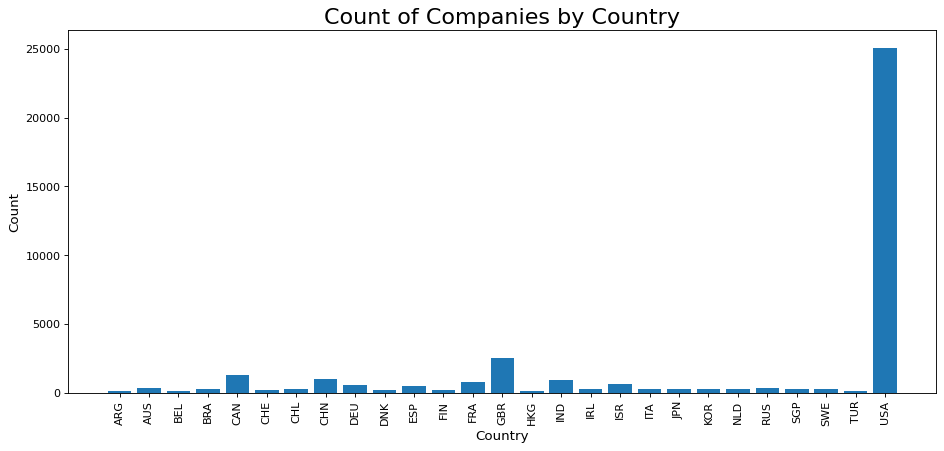

In [ ]:
#plot to show the number of companies by countries (excluding low prevalence countries)
companies = companies[companies['funding_total_usd'].notna()]
comp_country = companies.groupby("country_code").filter(lambda x: len(x) > 100)
comp_country_count = comp_country.groupby("country_code").count().reset_index()
comp_country_count = comp_country_count[comp_country_count['funding_total_usd']!=0]
figure(figsize=(14, 6), dpi=80)
plt.bar(comp_country_count['country_code'], comp_country_count['funding_total_usd'])
plt.title("Count of Companies by Country", fontsize = 20)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 7.2 Funding Value by Company Country

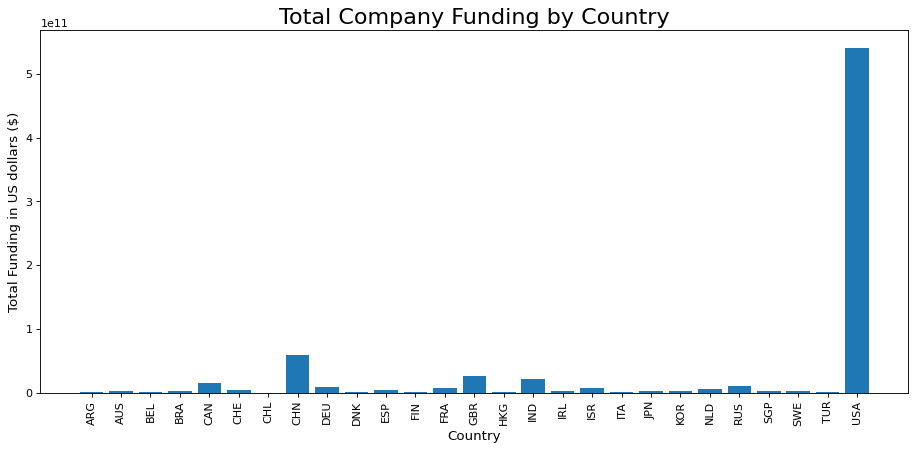

In [ ]:
#plot to show total funding by country
comp_country_sum = comp_country.groupby("country_code").sum().reset_index()
comp_country_sum = comp_country_sum[comp_country_sum['funding_total_usd']!=0]
figure(figsize=(14, 6), dpi=80)
plt.bar(comp_country_sum['country_code'], comp_country_sum['funding_total_usd'])
plt.title("Total Company Funding by Country", fontsize = 20)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 7.3 Average Funding by Company Country

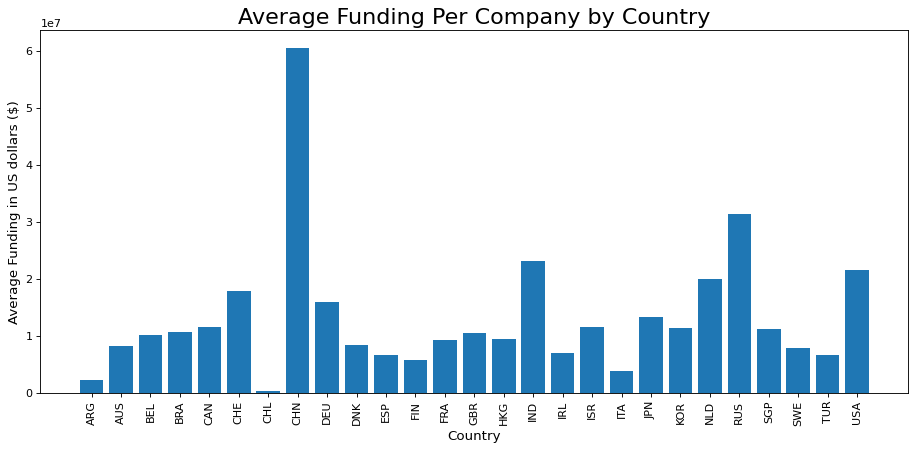

In [ ]:
#plot to show the average funding per country
country_avg = comp_country_sum['funding_total_usd']/comp_country_count['funding_total_usd']

comp_country_avg = {'country_code': comp_country_count['country_code'],
        'Average':country_avg}

comp_country_avg = pd.DataFrame(comp_country_avg)

figure(figsize=(14, 6), dpi=80)
plt.bar(comp_country_avg['country_code'], comp_country_avg['Average'])
plt.title("Average Funding Per Company by Country", fontsize = 20)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Average Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 7.4 Funding Count by Investor Country

In [ ]:
#total number of unique countries
df_countries = investments
unique_fund_countries = pd.unique(df_countries['investor_country_code'])
print(unique_fund_countries)
print(len(unique_fund_countries))

['CHN' 'DEU' 'CHL' 'USA' None 'FRA' 'BHR' 'KOR' 'JPN' 'RUS' 'AUT' 'SWE'
 'SGP' 'IND' 'ESP' 'HKG' 'POL' 'ITA' 'GBR' 'CHE' 'BEL' 'NLD' 'GHA' 'CAN'
 'ISR' 'AUS' 'IRL' 'CZE' 'BGR' 'JOR' 'HUN' 'MEX' 'FIN' 'SVN' 'BRA' 'PRT'
 'CYM' 'DNK' 'SAU' 'KEN' 'TUR' 'IDN' 'ARE' 'LIE' 'ZAF' 'MUS' 'SVK' 'NGA'
 'KHM' 'THA' 'LUX' 'NOR' 'UKR' 'EST' 'KWT' 'LVA' 'LTU' 'CRI' 'ARG' 'LBN'
 'TWN' 'ISL' 'MYS' 'URY' 'BMU' 'EGY' 'GRC' 'PHL' 'MLT' 'JEY' 'COL' 'LKA'
 'PAK' 'ROM' 'PSE' 'AZE' 'GEO' 'NZL' 'ARM' 'PER' 'MMR' 'VNM' 'BAH' 'QAT'
 'CYP' 'PRK' 'IRN' 'BLR' 'VEN' 'HRV' 'MAR' 'TTO' 'TGO' 'BLM' 'BGD' 'GTM'
 'GIB']
97


In [ ]:
#total number of countries that have funded more than 500 companies
df_countries_ = investments.groupby("investor_country_code").filter(lambda x: len(x) > 500)
low_fund_countries = pd.unique(df_countries_['investor_country_code'])
print(low_fund_countries)
print(len(low_fund_countries))

['CHN' 'DEU' 'CHL' 'USA' 'FRA' 'KOR' 'JPN' 'SWE' 'SGP' 'IND' 'ESP' 'HKG'
 'GBR' 'CHE' 'NLD' 'CAN' 'ISR' 'AUS' 'IRL' 'DNK']
20


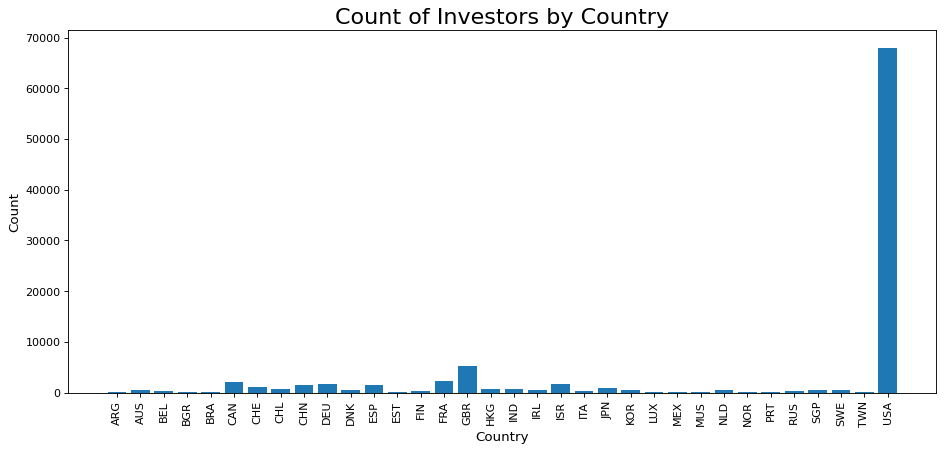

In [ ]:
#plot of number of companies each country has invested in
investments = investments[investments['raised_amount_usd'].notna()]
investments = investments.groupby("investor_country_code").filter(lambda x: len(x) > 100)
investments_count = investments.groupby("investor_country_code").count().reset_index()
investments_count = investments_count[investments_count['new_raised_amount_usd']!=0]
figure(figsize=(14, 6), dpi=80)
plt.bar(investments_count['investor_country_code'], investments_count['new_raised_amount_usd'])
plt.title("Count of Investors by Country", fontsize = 20)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 7.5 Funding Value by Investor Country

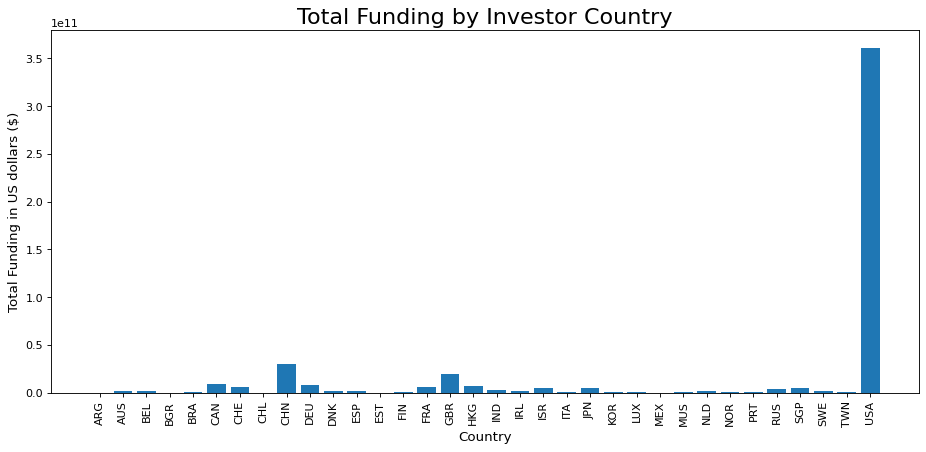

In [ ]:
#plot to show total funding by investment country
investments = investments[investments['raised_amount_usd'].notna()]
investments = investments.groupby("investor_country_code").filter(lambda x: len(x) > 100)
investments_sum = investments.groupby("investor_country_code").sum().reset_index()
investments_sum = investments_sum[investments_sum['new_raised_amount_usd']!=0]
figure(figsize=(14, 6), dpi=80)
plt.bar(investments_sum['investor_country_code'], investments_sum['new_raised_amount_usd'])
plt.title("Total Funding by Investor Country", fontsize = 20)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 7.6 Average Funding by Investor Country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

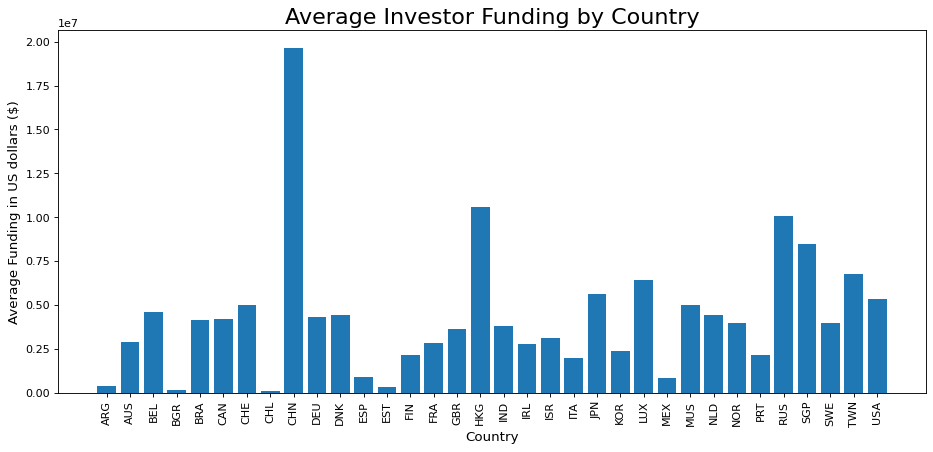

In [ ]:
#plot to show the average funding each country gave
avg = investments_sum['new_raised_amount_usd']/investments_count['new_raised_amount_usd']

investment_avg = {'investor_country_code': investments_count['investor_country_code'],
        'Average':avg}

investment_avg = pd.DataFrame(investment_avg)

figure(figsize=(14, 6), dpi=80)
plt.bar(investment_avg['investor_country_code'], investment_avg['Average'])
plt.title("Average Investor Funding by Country", fontsize = 20)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Average Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

<AxesSubplot:title={'center':'Total funding US vs Rest of the World'}, xlabel='Time Period'>

<Figure size 1120x480 with 0 Axes>

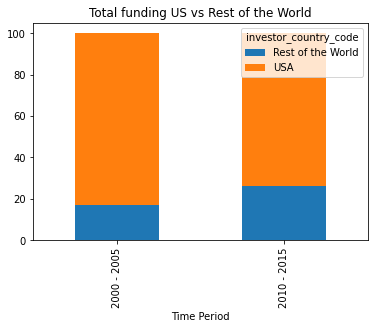

In [ ]:
#calculating the share of US vs Rest of World funding in 2000 - 2005
year = []
invest_year = investments['funded_at'].astype('string').reset_index()
invest_year = invest_year['funded_at']
for i in range(len(invest_year)):
    y = invest_year[i][:-6]
    year.append(y)
year = pd.DataFrame (year, columns = ['Year'])

investment_year_concat = pd.concat([year, investments], axis=1, join="inner")
investment_year_concat = investment_year_concat[['Year','new_raised_amount_usd','investor_country_code']]
investment_year_concat_old = investment_year_concat[(year['Year'].astype(float) > 1999) & (year['Year'].astype(float) < 2006)]
investment_year_concat_old.loc[investment_year_concat_old.investor_country_code != "USA", "investor_country_code"] = "Rest of the World"
investment_year_concat_old = investment_year_concat_old.groupby('investor_country_code').sum().reset_index()
total_invest_fund_old = investment_year_concat_old['new_raised_amount_usd'].sum()
investment_year_concat_old['2000 - 2005'] = (investment_year_concat_old['new_raised_amount_usd']/total_invest_fund_old)*100

#calculating the share of US vs Rest of World funding in 2010 - 2015

investment_year_concat_new = investment_year_concat[(year['Year'].astype(float) > 2009) & (year['Year'].astype(float) <= 2015)]
investment_year_concat_new.loc[investment_year_concat_new.investor_country_code != "USA", "investor_country_code"] = "Rest of the World"
investment_year_concat_new = investment_year_concat_new.groupby('investor_country_code').sum().reset_index()
total_invest_fund_new = investment_year_concat_new['new_raised_amount_usd'].sum()
investment_year_concat_old['2010 - 2015'] = (investment_year_concat_new['new_raised_amount_usd']/total_invest_fund_new)*100

investment_year_concat_old.drop("new_raised_amount_usd", axis=1, inplace=True)
investment_year_concat_old = investment_year_concat_old.set_index('investor_country_code')
investment_year_concat_old = investment_year_concat_old.transpose()
investment_year_concat_old = investment_year_concat_old.reset_index()
investment_year_concat_old.rename(columns = {'index':'Time Period'}, inplace = True)

figure(figsize=(14, 6), dpi=80)
investment_year_concat_old.plot(x='Time Period', kind='bar', stacked=True,title='Total funding US vs Rest of the World')

In [ ]:
investment_year_concat_old

investor_country_code,Time Period,Rest of the World,USA
0,2000 - 2005,17.101214,82.898786
1,2010 - 2015,26.235222,73.764778


## 8. Funding by Sector

### 8.1 Funding Count by Sector 

In [ ]:
#category_list has a large number of categories and many are multi-value attributes
pd.unique(companies['category_list'])

['Information Technology|Internet|SaaS|Search M..., 'Flash Storage|Service Providers|Startups', 'Pharmaceuticals', 'Innovation Engineering|Optimization|Services', 'Media|News', ..., 'Distributors|E-Commerce|Manufacturing', 'Advertising|Broadcasting|Content', 'Architecture|Banking|Finance', 'Automotive|Design|Limousines|Public Transport..., 'Consulting|Product Development Services|Produ...]
Length: 19043
Categories (19042, object): ['Information Technology|Internet|SaaS|Search M..., 'Flash Storage|Service Providers|Startups', 'Pharmaceuticals', 'Innovation Engineering|Optimization|Services', ..., 'Advertising|Broadcasting|Content', 'Architecture|Banking|Finance', 'Automotive|Design|Limousines|Public Transport..., 'Consulting|Product Development Services|Produ...]

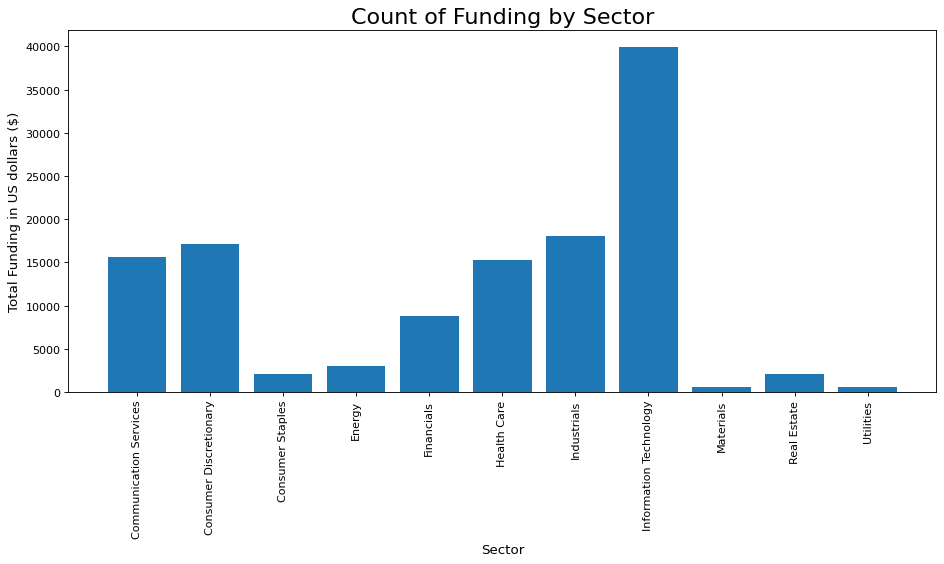

In [ ]:
#plot to show number of companies in each sector
final_ = final[['funded_at', 'raised_amount_usd', 'funding_round','Communication Services',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities']]

final_ = final_.melt(id_vars=['funded_at', 'raised_amount_usd', 'funding_round'], value_vars=['Communication Services',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'])
#filtering all companies  that belong to a particular sector
final_ = final_[final_['value'] == 1]

final_.dropna(inplace=True)

fund_sector_count = final_.groupby('variable').count().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(fund_sector_count["variable"], fund_sector_count['raised_amount_usd'])
plt.title("Count of Funding by Sector", fontsize = 20)
plt.xlabel("Sector", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 8.2 Funding Value by Sector

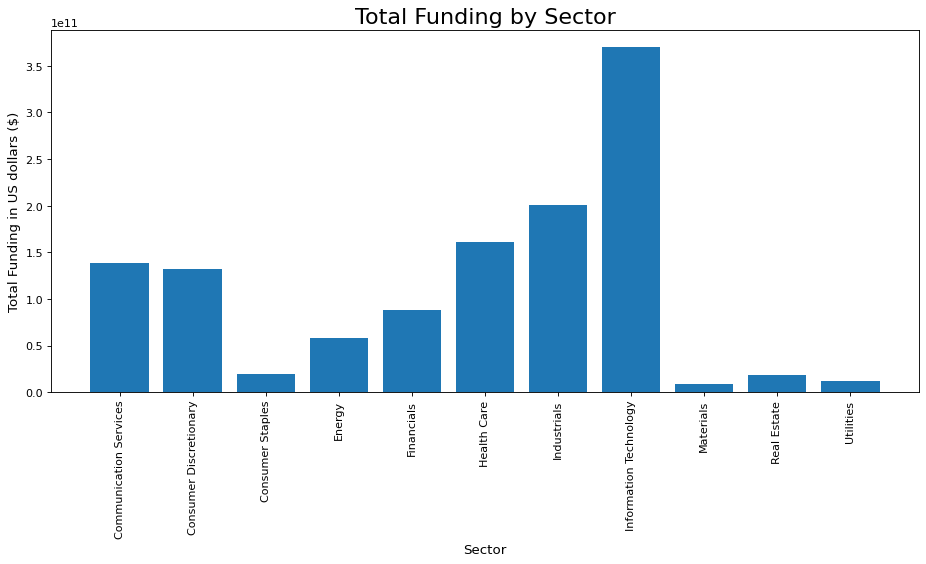

In [ ]:
#plot to show total funding by each Sector
fund_sector_sum = final_.groupby('variable').sum().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(fund_sector_sum["variable"], fund_sector_sum['raised_amount_usd'])
plt.title("Total Funding by Sector", fontsize = 20)
plt.xlabel("Sector", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 8.3 Average Funding by Sector

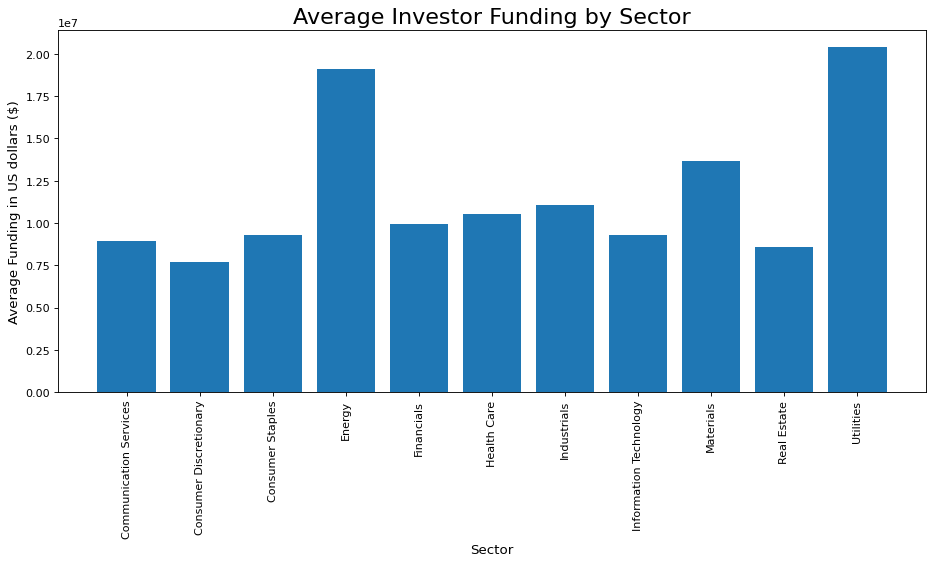

In [ ]:
#plot to show the average find each sector received
avg = fund_sector_sum['raised_amount_usd']/fund_sector_count['raised_amount_usd']

fund_sector_avg = {'variable': fund_sector_count['variable'],
        'Average':avg}

fund_sector_avg = pd.DataFrame(fund_sector_avg)

figure(figsize=(14, 6), dpi=80)
plt.bar(fund_sector_avg['variable'], fund_sector_avg['Average'])
plt.title("Average Investor Funding by Sector", fontsize = 20)
plt.xlabel("Sector", fontsize = 12)
plt.ylabel("Average Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 8.4 Share of Sector Funding over Time

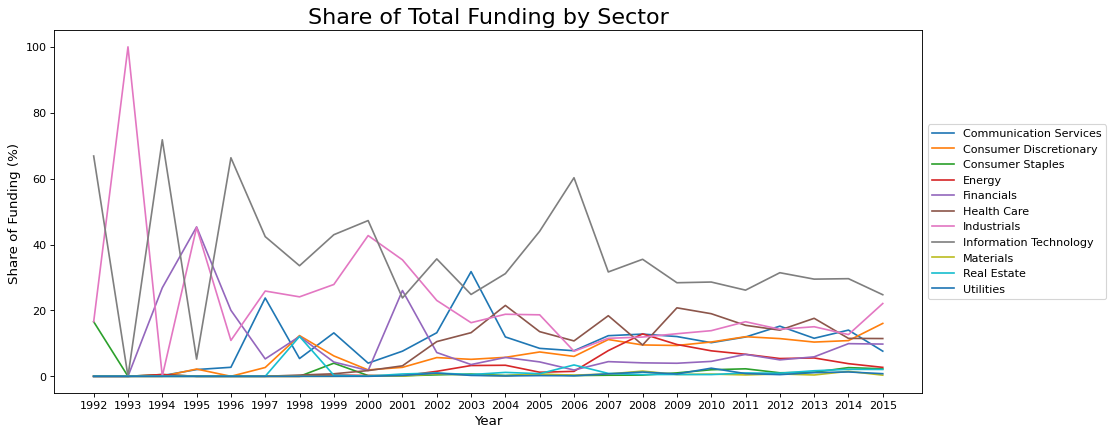

In [ ]:
#plot showing how the share of sector funding changed over time 
year = []
x = final_['funded_at'].astype('string').reset_index()
x = x['funded_at']
for i in range(len(x)):
    y = x[i][:-6]
    year.append(y)
year = pd.DataFrame (year, columns = ['Year'])
final_concat = pd.concat([year, final_.reset_index()], axis=1, join="inner")
fund_sector_year = final_concat.groupby(['variable','Year']).sum().reset_index()
fund_sector_year
total_year = fund_sector_year.groupby('Year').sum().reset_index()
total_year.rename(columns={'raised_amount_usd': 'Total'}, inplace=True)
fund_sector_year = fund_sector_year.merge(total_year, on='Year', how='left')
fund_sector_year['Proportion'] = (fund_sector_year['raised_amount_usd']/fund_sector_year['Total'])*100
fund_sector_year = fund_sector_year[['variable', 'Year', 'Proportion']]
fund_sector_year = fund_sector_year.pivot(index='Year', columns='variable')['Proportion'].reset_index()
fund_sector_year = fund_sector_year.fillna(0)
fund_sector_year_filter = fund_sector_year[fund_sector_year['Year'].astype(float) > 1990]
figure(figsize=(14, 6), dpi=80)
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[1]], label = fund_sector_year_filter.columns[1])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[2]], label =fund_sector_year_filter.columns[2])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[3]], label =fund_sector_year_filter.columns[3])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[4]], label =fund_sector_year_filter.columns[4])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[5]], label =fund_sector_year_filter.columns[5])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[6]], label =fund_sector_year_filter.columns[6])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[7]], label =fund_sector_year_filter.columns[7])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[8]], label =fund_sector_year_filter.columns[8])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[9]], label =fund_sector_year_filter.columns[9])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[10]], label =fund_sector_year_filter.columns[10])
plt.plot(fund_sector_year_filter['Year'], fund_sector_year_filter[fund_sector_year_filter.columns[11]], label =fund_sector_year_filter.columns[11])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Share of Total Funding by Sector', fontsize = 20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Share of Funding (%) ', fontsize = 12)
plt.show()

### 8.5 IT Funding by Funding Type

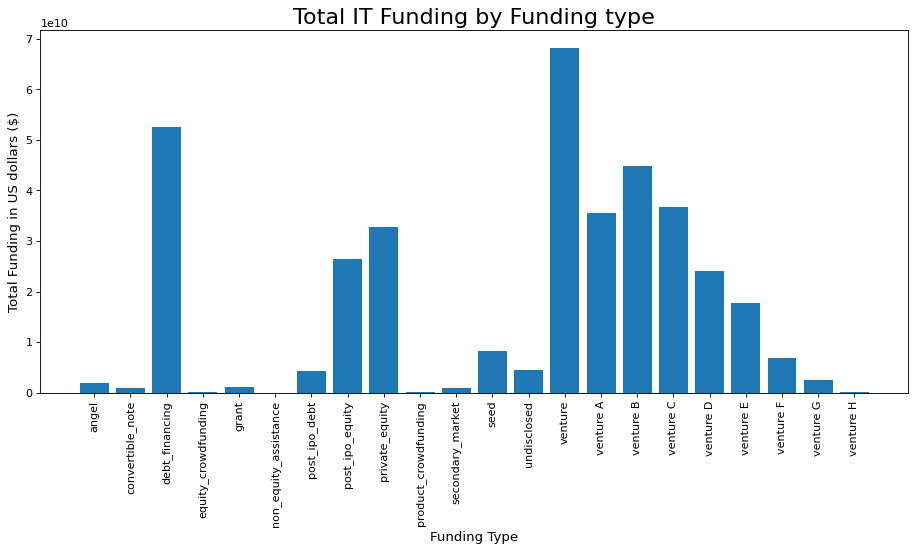

In [ ]:
#deep dive plot to show IT funding by funding type

it = final_[final_['variable'] == 'Information Technology']
it = it.groupby('funding_round').sum().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(it["funding_round"], it['raised_amount_usd'])
plt.title("Total IT Funding by Funding type", fontsize = 20)
plt.xlabel("Funding Type", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 8.6 Health Care Funding by Funding Type

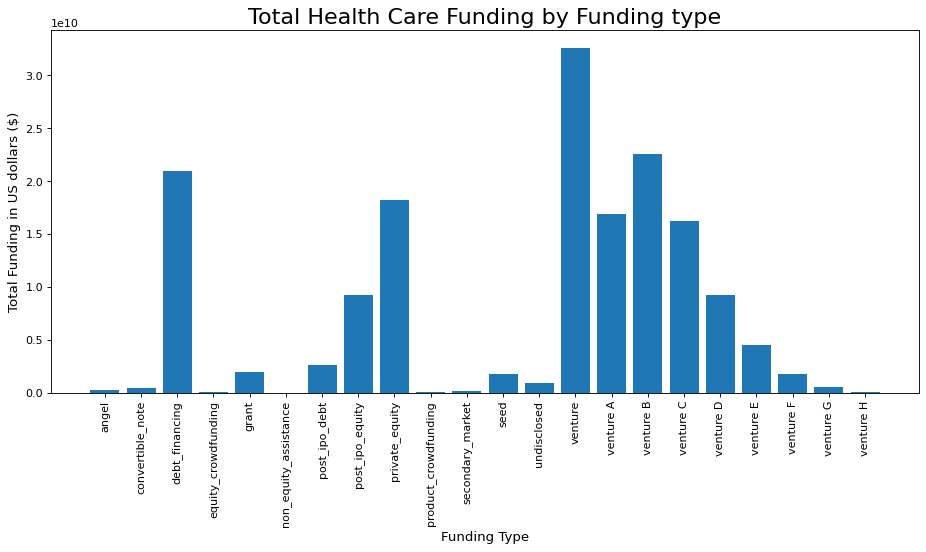

In [ ]:
#deep dive plot to show health care funding by funding type

hc = final_[final_['variable'] == 'Health Care']
hc = hc.groupby('funding_round').sum().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(hc["funding_round"], hc['raised_amount_usd'])
plt.title("Total Health Care Funding by Funding type", fontsize = 20)
plt.xlabel("Funding Type", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### 8.7 Industrials Funding by Funding Type

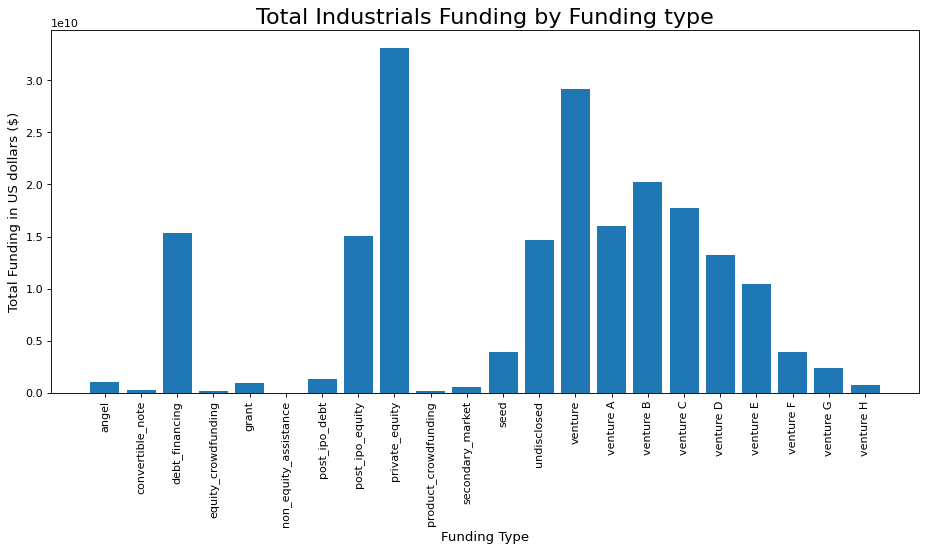

In [ ]:
#deep dive plot to show Industrial funding by funding type

industry = final_[final_['variable'] == 'Industrials']
industry = industry.groupby('funding_round').sum().reset_index()
figure(figsize=(14, 6), dpi=80)
plt.bar(industry["funding_round"], industry['raised_amount_usd'])
plt.title("Total Industrials Funding by Funding type", fontsize = 20)
plt.xlabel("Funding Type", fontsize = 12)
plt.ylabel("Total Funding in US dollars ($)", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

## EDA dashboard Input

In [ ]:
#manipulating sector, company country, investor country and funding type data into consistent format for dashboard
#manipulating sum, count and average data
sector_sum = final_concat.groupby(['Year', 'variable']).sum().reset_index()
sector_sum_eda = sector_sum[['variable', 'raised_amount_usd','Year']]
sector_sum_eda['Transformation'] = 'Sum'
sector_sum_eda['Category'] = 'Sector'
sector_sum_eda.rename(columns = {'variable' : 'x-axis', 'raised_amount_usd' : 'value'}, inplace = True)

sector_count = final_concat.groupby(['Year', 'variable']).count().reset_index()
sector_count_eda = sector_count[['variable', 'raised_amount_usd','Year']]
sector_count_eda['Transformation'] = 'Count'
sector_count_eda['Category'] = 'Sector'
sector_count_eda.rename(columns = {'variable' : 'x-axis', 'raised_amount_usd' : 'value'}, inplace = True)

avg = sector_sum_eda['value']/sector_count_eda['value']
sector_avg_eda = {'x-axis': sector_count_eda['x-axis'],
        'value':avg, 'Year': sector_count_eda['Year'], 'Transformation' : 'Average', 'Category':'Sector'}
sector_avg_eda = pd.DataFrame(sector_avg_eda)

rounds_fund_sum_eda = round_time.groupby(['Year', 'funding_round']).sum().reset_index()
rounds_fund_sum_eda = rounds_fund_sum_eda[['funding_round', 'raised_amount_usd','Year']]
rounds_fund_sum_eda['Transformation'] = 'Sum'
rounds_fund_sum_eda['Category'] = 'Funding Type'
rounds_fund_sum_eda.rename(columns = {'funding_round' : 'x-axis', 'raised_amount_usd' : 'value'}, inplace = True)

rounds_fund_count_eda = round_time.groupby(['Year', 'funding_round']).count().reset_index()
rounds_fund_count_eda = rounds_fund_count_eda[['funding_round', 'raised_amount_usd','Year']]
rounds_fund_count_eda['Transformation'] = 'Count'
rounds_fund_count_eda['Category'] = 'Funding Type'
rounds_fund_count_eda.rename(columns = {'funding_round' : 'x-axis', 'raised_amount_usd' : 'value'}, inplace = True)

avg = rounds_fund_sum_eda['value']/rounds_fund_count_eda['value']
rounds_fund_avg_eda = {'x-axis': rounds_fund_count_eda['x-axis'],
        'value':avg, 'Year': rounds_fund_count_eda['Year'], 'Transformation' : 'Average', 'Category':'Funding Type'}
rounds_fund_avg_eda = pd.DataFrame(rounds_fund_avg_eda)

comp_country_sum_eda = round_time.groupby(['Year', 'company_country_code']).sum().reset_index()
comp_country_sum_eda = comp_country_sum_eda[['company_country_code', 'raised_amount_usd','Year']]
comp_country_sum_eda['Transformation'] = 'Sum'
comp_country_sum_eda['Category'] = 'Company Country'
comp_country_sum_eda.rename(columns = {'company_country_code' : 'x-axis', 'raised_amount_usd' : 'value'}, inplace = True)

comp_country_count_eda = round_time.groupby(['Year', 'company_country_code']).count().reset_index()
comp_country_count_eda = comp_country_count_eda[['company_country_code', 'raised_amount_usd','Year']]
comp_country_count_eda['Transformation'] = 'Count'
comp_country_count_eda['Category'] = 'Company Country'
comp_country_count_eda.rename(columns = {'company_country_code' : 'x-axis', 'raised_amount_usd' : 'value'}, inplace = True)

avg = comp_country_sum_eda['value']/comp_country_count_eda['value']
comp_country_avg_eda = {'x-axis': comp_country_count_eda['x-axis'],
        'value':avg, 'Year': comp_country_count_eda['Year'], 'Transformation' : 'Average', 'Category':'Company Country'}
comp_country_avg_eda = pd.DataFrame(comp_country_avg_eda)

investments_sum_eda = investment_year_concat.groupby(['Year', 'investor_country_code']).sum().reset_index()
investments_sum_eda = investments_sum_eda[['investor_country_code', 'new_raised_amount_usd','Year']]
investments_sum_eda['Transformation'] = 'Sum'
investments_sum_eda['Category'] = 'Investor Country'
investments_sum_eda.rename(columns = {'investor_country_code' : 'x-axis', 'new_raised_amount_usd' : 'value'}, inplace = True)

investments_count_eda = investment_year_concat.groupby(['Year', 'investor_country_code']).count().reset_index()
investments_count_eda = investments_count_eda[['investor_country_code', 'new_raised_amount_usd','Year']]
investments_count_eda['Transformation'] = 'Count'
investments_count_eda['Category'] = 'Investor Country'
investments_count_eda.rename(columns = {'investor_country_code' : 'x-axis', 'new_raised_amount_usd' : 'value'}, inplace = True)

avg = investments_sum_eda['value']/investments_count_eda['value']
investments_avg_eda = {'x-axis': investments_count_eda['x-axis'],
        'value':avg, 'Year': investments_count_eda['Year'], 'Transformation' : 'Average', 'Category':'Investor Country'}
investments_avg_eda = pd.DataFrame(investments_avg_eda)
#appending all above data into find_eda
final_eda = pd.concat([sector_sum_eda, sector_count_eda, sector_avg_eda,rounds_fund_sum_eda, rounds_fund_count_eda, rounds_fund_avg_eda, comp_country_sum_eda, comp_country_count_eda, comp_country_avg_eda, investments_sum_eda, investments_count_eda, investments_avg_eda])
final_eda



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,x-axis,value,Year,Transformation,Category
0,Consumer Discretionary,2.500000e+05,1977,Sum,Sector
1,Consumer Staples,2.500000e+05,1977,Sum,Sector
2,Information Technology,2.500000e+05,1977,Sum,Sector
3,Information Technology,1.000000e+06,1979,Sum,Sector
4,Consumer Discretionary,1.550000e+05,1982,Sum,Sector
...,...,...,...,...,...
562,RUS,3.636150e+06,2015,Average,Investor Country
563,SGP,3.181572e+06,2015,Average,Investor Country
564,SWE,2.661750e+06,2015,Average,Investor Country
565,TWN,6.319815e+06,2015,Average,Investor Country


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f906c6b7-4fb3-42a0-9ffa-f1056dea520e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>